In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
if os.path.abspath('../') not in sys.path:
    sys.path.append(os.path.abspath('../'))

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from utils.dummy import DummyDatasetCifar10, DummyModelCifar10

In [5]:
BATCH_SIZE = 10
device = 'cuda'

In [15]:
model = DummyModelCifar10()
cifar10 = DummyDatasetCifar10(batch_size=BATCH_SIZE, data_root='../data')

Files already downloaded and verified
Files already downloaded and verified


In [16]:
# model.load_state_dict(torch.load('data/dummy.weights'))

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [18]:
%%time
model = model.to(device)
all_test = len(cifar10.testloader) * BATCH_SIZE
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(cifar10.trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    # eval accuracy on test
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(cifar10.testloader, 0):
            inputs, labels = data
            _, predicted = torch.max(model(inputs.to(device)).cpu(), 1)
            correct += (labels == predicted).sum().detach().numpy()
    print(f'accuracy on test: {correct / all_test}')

print('Finished Training')

[Epoch 1, Batch  2000] loss: 2.002
[Epoch 1, Batch  4000] loss: 1.652
accuracy on test: 0.4427
[Epoch 2, Batch  2000] loss: 1.444
[Epoch 2, Batch  4000] loss: 1.361
accuracy on test: 0.535
[Epoch 3, Batch  2000] loss: 1.241
[Epoch 3, Batch  4000] loss: 1.197
accuracy on test: 0.5923
[Epoch 4, Batch  2000] loss: 1.092
[Epoch 4, Batch  4000] loss: 1.086
accuracy on test: 0.6108
[Epoch 5, Batch  2000] loss: 0.992
[Epoch 5, Batch  4000] loss: 0.991
accuracy on test: 0.6123
[Epoch 6, Batch  2000] loss: 0.890
[Epoch 6, Batch  4000] loss: 0.899
accuracy on test: 0.6293
[Epoch 7, Batch  2000] loss: 0.803
[Epoch 7, Batch  4000] loss: 0.812
accuracy on test: 0.6504
[Epoch 8, Batch  2000] loss: 0.709
[Epoch 8, Batch  4000] loss: 0.741
accuracy on test: 0.6608
[Epoch 9, Batch  2000] loss: 0.622
[Epoch 9, Batch  4000] loss: 0.677
accuracy on test: 0.6665
[Epoch 10, Batch  2000] loss: 0.547
[Epoch 10, Batch  4000] loss: 0.588
accuracy on test: 0.6569
Finished Training
CPU times: user 3min 29s, sys: 

In [11]:
model.eval()

DummyModelCifar10(
  (conv1): Conv1d(3, 15, kernel_size=(97,), stride=(1,))
  (pool): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(15, 30, kernel_size=(50,), stride=(1,))
  (fc1): Linear(in_features=5490, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

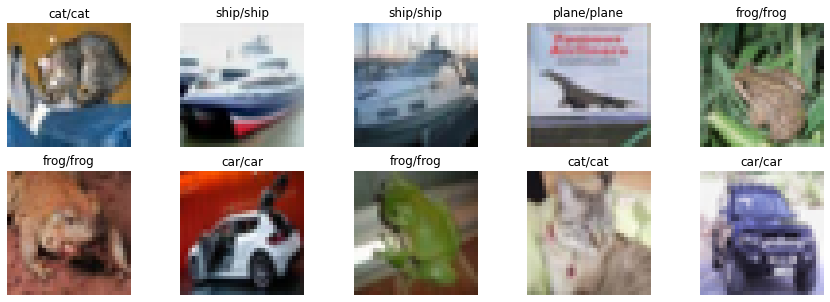

In [19]:
dataiter = iter(cifar10.testloader)
images, labels = dataiter.next()
_, predicted = torch.max(model(images.to(device)), 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
for ax, img, lbl, pred in zip(axs.flatten(), images, labels, predicted):
    ax.imshow(np.transpose((img / 2 + 0.5).numpy(), (1,2,0)))
    ax.axis('off')
    ax.set_title(f'{cifar10.classes[lbl]}/{cifar10.classes[pred]}')
    
plt.show()

In [20]:
correct = 0
all_ = len(cifar10.testloader) * BATCH_SIZE
with torch.no_grad():
    for i, data in enumerate(cifar10.testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        _, predicted = torch.max(model(inputs.to(device)).cpu(), 1)
        correct += (labels == predicted).sum().detach().numpy()
        
print(f'accuracy: {correct / all_}')

accuracy: 0.6569


In [21]:
torch.save(model.state_dict(), 'data/dummy.weights')